# IMPORTS

In [52]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [53]:
#ajuste na visualização dos gráficos
from IPython.core.display import HTML

def jupyter_settings():
    
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

# CARREGAMENTO DOS DADOS

In [54]:
dfSales = pd.read_csv('../data/train.csv',low_memory=False)
print("Features:{}\n\nLinhas:{}\n\nColunas:{}".format(dfSales.columns,dfSales.shape[0],dfSales.shape[1]))

Features:Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Linhas:1017209

Colunas:9


In [55]:
dfStores = pd.read_csv('../data/store.csv',low_memory=False)
print("Features:{}\n\nLinhas:{}\n\nColunas:{}".format(dfStores.columns,dfStores.shape[0],dfStores.shape[1]))

Features:Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Linhas:1115

Colunas:10


In [56]:
dfSales.head(10)#venda das lojas por data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [57]:
dfStores.head(10)#perfil de cada loja

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [58]:
dfRaw = pd.merge (dfSales , dfStores, how = 'left', on = 'Store')#merge dos dados pelas lojas
dfRaw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [59]:
print("Features:{}\n\nLinhas:{}\n\nColunas:{}".format(dfRaw.columns,dfRaw.shape[0],dfRaw.shape[1]))

Features:Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Linhas:1017209

Colunas:18


# LIMPEZA DOS DADOS

In [60]:
df1 = dfRaw.copy()

In [61]:
df1.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [62]:
#alterando o tipo da data para facilitar a etapa de feature engineering
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [63]:
#checagem dos dados faltantes
df1.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [64]:
#preencher dados faltantes
df1['CompetitionDistance'] = df1['CompetitionDistance'].apply(lambda x: 100000.0 if math.isnan(x) else x) 
#atribuindo um valor mais alto que o maior encontrado pelo df1['CompetitionDistance'].max(): 75860.0

df1['CompetitionOpenSinceMonth'] = df1.apply(lambda x: x['Date'].month if math.isnan(x['CompetitionOpenSinceMonth']) else x['CompetitionOpenSinceMonth'], axis=1)
#atribuindo o mesmo mes caso nao tenha dados do historico de concorrencia, axis 1 quando acessamos mais de 1 coluna
#assumir valores para contribuir em dados de comportamento das vendas com competidor
#existem dados que mostram que tem concorrencia mas nao tem histórico
#caso de algum problema de performance por causa desse fator, alteramos no próximo ciclo

df1['CompetitionOpenSinceYear'] = df1.apply(lambda x: x['Date'].year if math.isnan(x['CompetitionOpenSinceMonth']) else x['CompetitionOpenSinceMonth'], axis=1)

df1['Promo2SinceWeek'] = df1.apply(lambda x: x['Date'].week if math.isnan(x['Promo2SinceWeek']) else x['Promo2SinceWeek'], axis=1)

df1['Promo2SinceYear'] = df1.apply(lambda x: x['Date'].year if math.isnan(x['Promo2SinceYear']) else x['Promo2SinceYear'], axis=1)

#para PromoInterval, em casos de dados faltantes a loja não esta participando
#PromoInterval mostra os meses (abreviados e separados por vírgula) que tem promoção no ano, ex: Feb,May,Aug,Nov
#conferir a data atual com os meses do PromoInterval e marcar se teve ou nao alguma promoção

#dicionario para usar como mascara na identificação dos meses
monthMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['PromoInterval'].fillna(0,inplace=True)

#coluna nova extraindo o mes da data
df1['MonthMap'] = df1['Date'].dt.month.map(monthMap)

#coluna nova mostrando a participação da loja na promo 2
df1['IsPromo'] = df1[['PromoInterval','MonthMap']].apply(lambda x: 0 if x['PromoInterval'] == 0 else 1 if x['MonthMap'] in x['PromoInterval'].split(',') else 0, axis =1)

In [65]:
#checagem dos dados faltantes após a limpeza dos dados
df1.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
MonthMap                     0
IsPromo                      0
dtype: int64

In [66]:
df1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
MonthMap                             object
IsPromo                               int64
dtype: object

In [67]:
#casting dos tipos CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceYear, Promo2SinceYear de float para int
df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].astype(int)
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].astype(int)

df1['Promo2SinceWeek'] = df1['Promo2SinceWeek'].astype(int)
df1['Promo2SinceYear'] = df1['Promo2SinceYear'].astype(int)

In [68]:
cleanDf = df1.copy()
cleanDf.to_csv('cleanDf.csv')

In [69]:
df1 = pd.read_csv('cleanDf.csv',low_memory = False)

# ESTATÍSTICA DESCRITIVA DOS DADOS

In [70]:
#Separação dos dados em variáveis categóricas e variáveis numéricas

numAtt = df1.select_dtypes(include = ['int64','float64'])
catAtt = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

In [71]:
numAtt.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,IsPromo
0,0,1,5,5263,555,1,1,1,1270.0,9,9,0,31,2015,0
1,1,2,5,6064,625,1,1,1,570.0,11,11,1,13,2010,1
2,2,3,5,8314,821,1,1,1,14130.0,12,12,1,14,2011,1
3,3,4,5,13995,1498,1,1,1,620.0,9,9,0,31,2015,0
4,4,5,5,4822,559,1,1,1,29910.0,4,4,0,31,2015,0


In [72]:
catAtt.head()

,Date,StateHoliday,StoreType,Assortment,PromoInterval,MonthMap
0,2015-07-31,0,c,a,0,Jul
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,2015-07-31,0,c,c,0,Jul
4,2015-07-31,0,a,a,0,Jul


In [73]:
df = numAtt.agg(["mean","median","std","min","max","skew","kurtosis"]).T
df

,mean,median,std,min,max,skew,kurtosis
Unnamed: 0,508604.000000,508604.0,293643.089324,0.0,1017208.0,1.946584e-15,-1.200000
Store,558.429727,558.0,321.908651,1.0,1115.0,-9.548800e-04,-1.200524
DayOfWeek,3.998341,4.0,1.997391,1.0,7.0,1.592823e-03,-1.246873
Sales,5773.818972,5744.0,3849.926175,0.0,41551.0,6.414596e-01,1.778375
Customers,633.145946,609.0,464.411734,0.0,7388.0,1.598650e+00,7.091773
Open,0.830107,1.0,0.375539,0.0,1.0,-1.758045e+00,1.090723
Promo,0.381515,0.0,0.485759,0.0,1.0,4.878378e-01,-1.762018
SchoolHoliday,0.178647,0.0,0.383056,0.0,1.0,1.677842e+00,0.815154
CompetitionDistance,5675.712376,2330.0,9085.163758,20.0,100000.0,4.637208e+00,35.287543
CompetitionOpenSinceMonth,6.786849,7.0,3.311087,1.0,12.0,-4.207563e-02,-1.232607


In [74]:
catAtt.apply(lambda x: x.unique().shape[0])

Date             942
StateHoliday       4
StoreType          4
Assortment         3
PromoInterval      4
MonthMap          12
dtype: int64

In [75]:
df2 = df1[(df1['StateHoliday']!='0') & (df1['Sales']>0)]

<AxesSubplot: xlabel='Assortment', ylabel='Sales'>

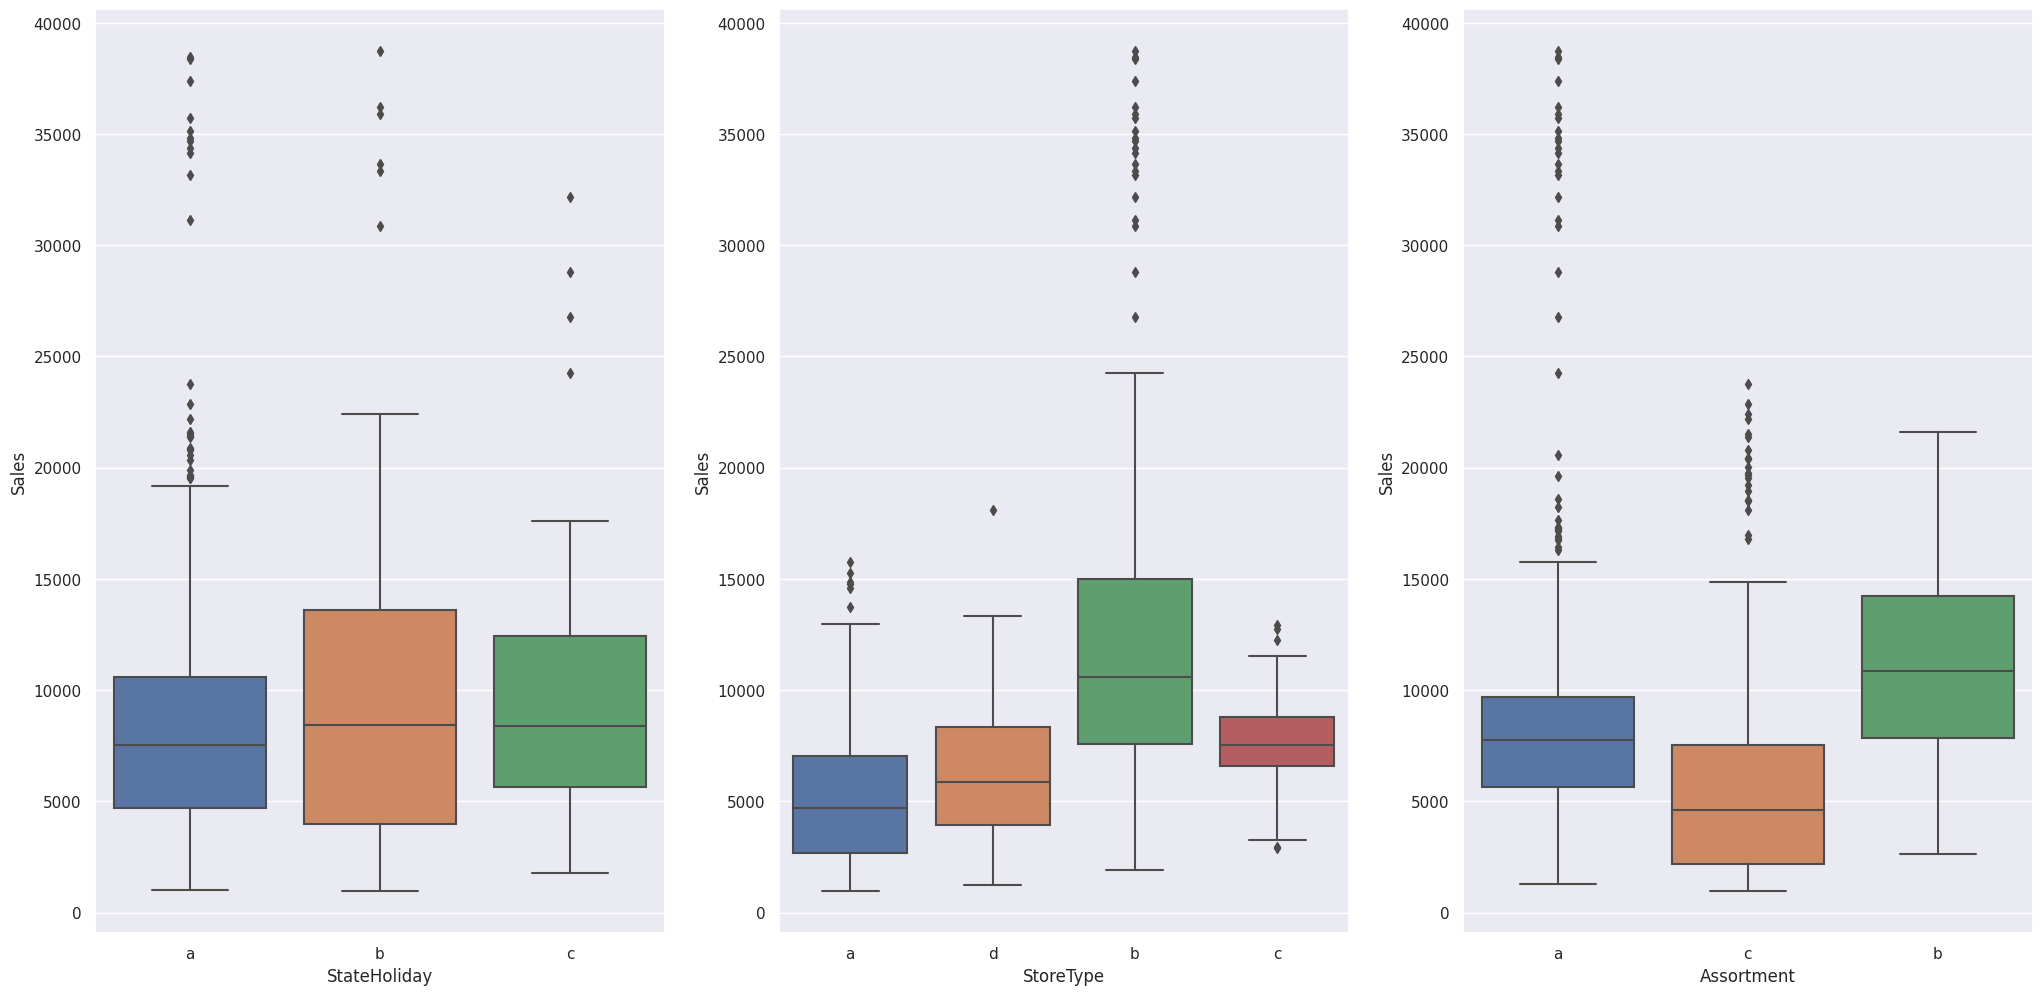

In [76]:
#Mostrar o quanto a variavel resposta(vendas) está distribuída dentro das variáveis categóricas
plt.subplot(1,3,1)
sns.boxplot(x='StateHoliday',y='Sales',data = df2)

plt.subplot(1,3,2)
sns.boxplot(x='StoreType',y='Sales',data = df2)

plt.subplot(1,3,3)
sns.boxplot(x='Assortment',y='Sales',data = df2)